In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

plt.style.use('seaborn')

pd.set_option('display.max_rows', 250)
%matplotlib inline

In [2]:
df = pd.read_csv('oasis_data.csv')

In [3]:
df

,Purchase Date,Product Name,OEM,Item Price USD,Ordered Qty,Row Total,Shipping Country,Region
0,09-09-2021,Macbook Pro 13” i7,apple-13-i7,1811.00,1,1811.00,Bulgaria,EMEA
1,09-09-2021,Macbook Pro 13” i7,apple-13-i7,1811.00,1,1811.00,Bulgaria,EMEA
2,09-09-2021,Dell Multi-device Wireless Mouse - MS5320W,dell-MS5320W,25.00,1,25.00,United States,EMEA
3,09-09-2021,Apple Magic Mouse,apple-magic-mouse,100.00,1,100.00,Bulgaria,NaN
4,09-09-2021,Apple Magic Mouse,apple-magic-mouse,100.00,1,100.00,Bulgaria,NaN
...,...,...,...,...,...,...,...,...
25025,21-03-2022,"Dell Latitude 7420 14"" 2-in-1",dell-7420-emea,1360.00,1,1360.00,United Kingdom,EMEA
25026,21-03-2022,Dell Wireless Keyboard & Mouse Combo - KM7120W,dell-KM7120W-emea,40.00,1,40.00,Bulgaria,EMEA
25027,21-03-2022,Jabra Evolve 40 - Wired Headset,jabra-evolve40-emea,79.00,1,79.00,Bulgaria,EMEA
25028,21-03-2022,Jabra Evolve2 40,rakesh-24089-989-899,10800.00,1,10800.00,India,APAC


In [4]:
#number of features & data points
df.shape


(25030, 8)

In [5]:
#getting some info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25030 entries, 0 to 25029
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Purchase Date     25030 non-null  object 
 1   Product Name      25030 non-null  object 
 2   OEM               25030 non-null  object 
 3   Item Price USD    25030 non-null  float64
 4   Ordered Qty       25030 non-null  int64  
 5   Row Total         25030 non-null  float64
 6   Shipping Country  25030 non-null  object 
 7   Region            24421 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [6]:
#categorical features
 # Region
 # Shipping Country
 # OEM
 # Product Name

#check for missing values
df.isnull().sum()



Purchase Date         0
Product Name          0
OEM                   0
Item Price USD        0
Ordered Qty           0
Row Total             0
Shipping Country      0
Region              609
dtype: int64

In [7]:
#handling missing values
  # mode -> most repeated value

#replacing missing values in "Region" with mode 

mode_of_Region = df.pivot_table(values = 'Region', columns = 'Shipping Country', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Region)

Shipping Country Argentina Armenia Australia Austria Belgium Brazil Bulgaria  \
Region                AMER    EMEA      APAC    EMEA    EMEA   AMER     EMEA   

Shipping Country Canada Chile China  ... Sweden Switzerland  \
Region             AMER  AMER  APAC  ...   EMEA        EMEA   

Shipping Country Taiwan, Province of China Thailand Turkey Ukraine  \
Region                                APAC     APAC   EMEA    EMEA   

Shipping Country United Arab Emirates United Kingdom United States Vietnam  
Region                           EMEA           EMEA          AMER    APAC  

[1 rows x 63 columns]


In [8]:
missing_values = df['Region'].isnull()

In [9]:
print(missing_values)

0        False
1        False
2        False
3         True
4         True
         ...  
25025    False
25026    False
25027    False
25028    False
25029    False
Name: Region, Length: 25030, dtype: bool


In [10]:
df.loc[missing_values, 'Region'] = df.loc[missing_values , 'Shipping Country'].apply(lambda x: mode_of_Region)

In [11]:
#check again for missing values
df.isnull().sum()

Purchase Date       0
Product Name        0
OEM                 0
Item Price USD      0
Ordered Qty         0
Row Total           0
Shipping Country    0
Region              0
dtype: int64

In [12]:
#data analysis
df.describe()

,Item Price USD,Ordered Qty,Row Total
count,25030.000000,25030.000000,25030.000000
mean,5616.649270,1.000879,5620.239376
std,27387.133718,0.032218,27390.278117
min,0.000000,1.000000,0.000000
25%,79.000000,1.000000,79.000000
50%,199.000000,1.000000,199.000000
75%,616.880000,1.000000,616.880000
max,240802.940000,3.000000,240802.940000


In [13]:
#numerical features plot
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


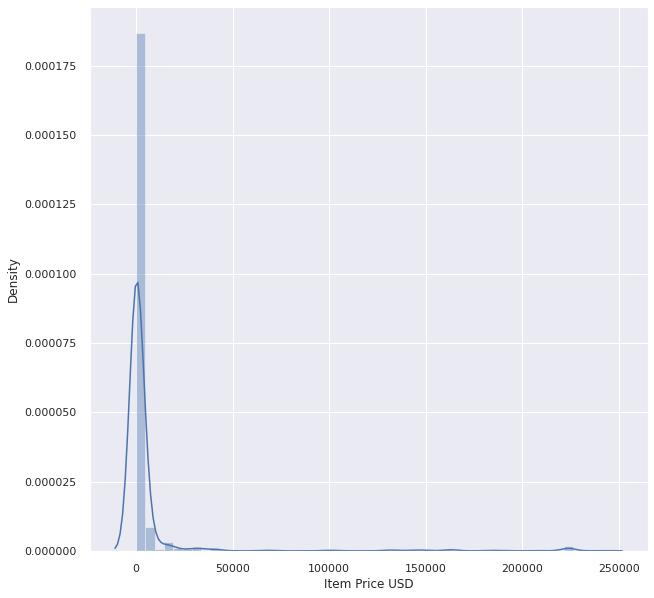

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(df['Item Price USD'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


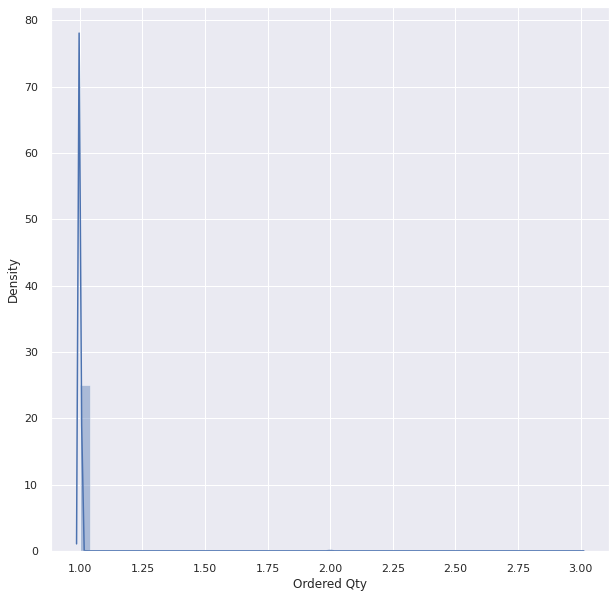

In [15]:
plt.figure(figsize=(10,10))
sns.distplot(df['Ordered Qty'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


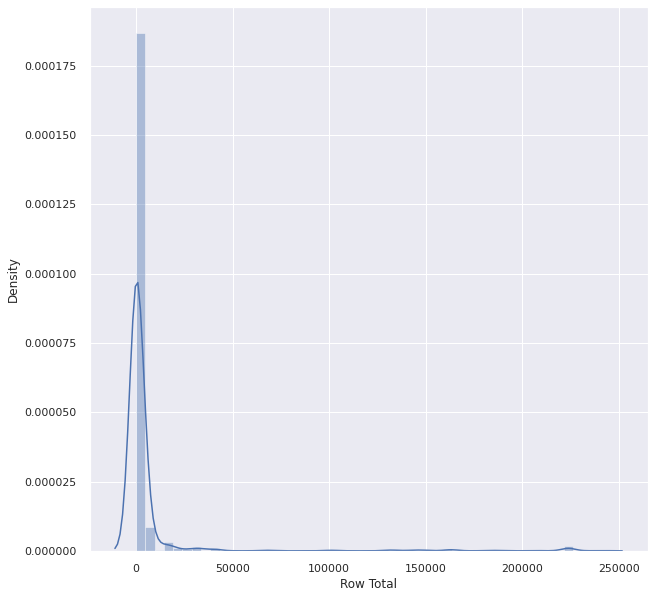

In [16]:
plt.figure(figsize=(10,10))
sns.distplot(df['Row Total'])
plt.show()

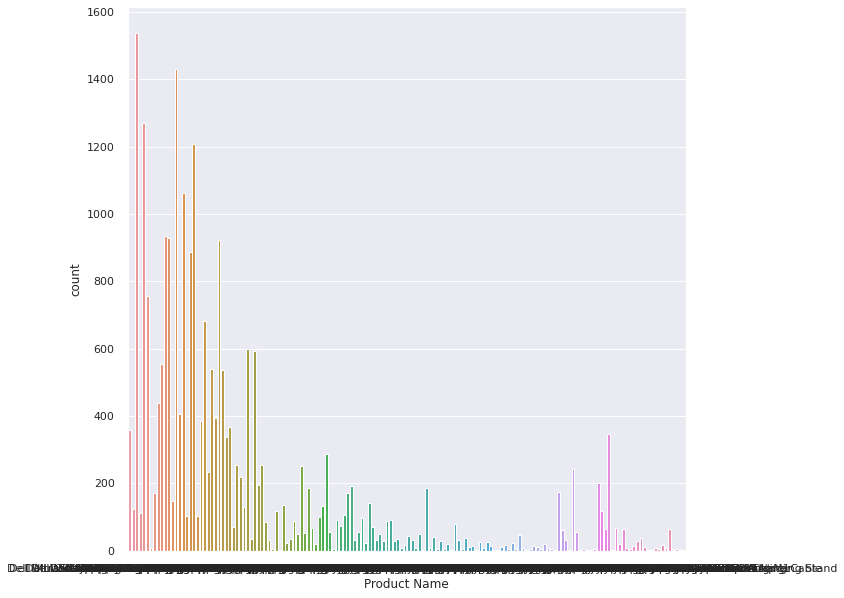

In [17]:
#categorical feature plot
plt.figure(figsize=(10,10))
sns.countplot(x ='Product Name', data = df)
plt.show()

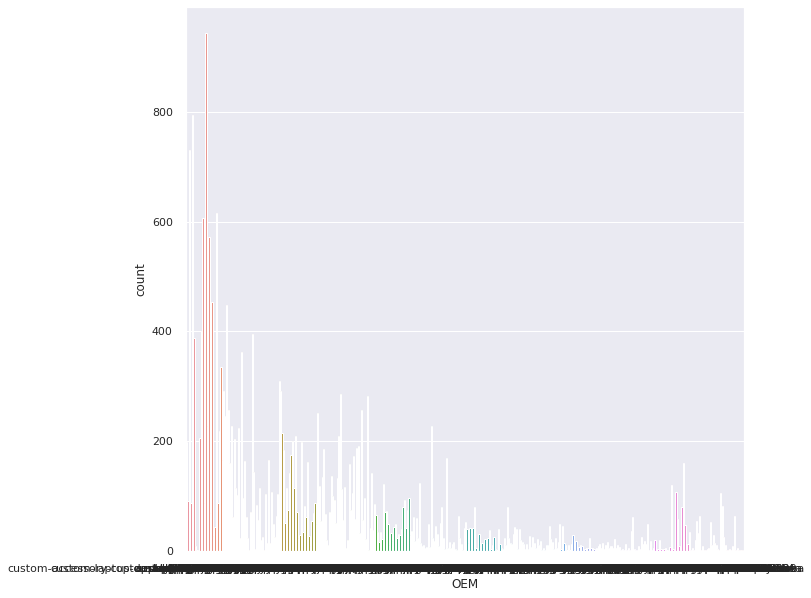

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x ='OEM', data = df)
plt.show()

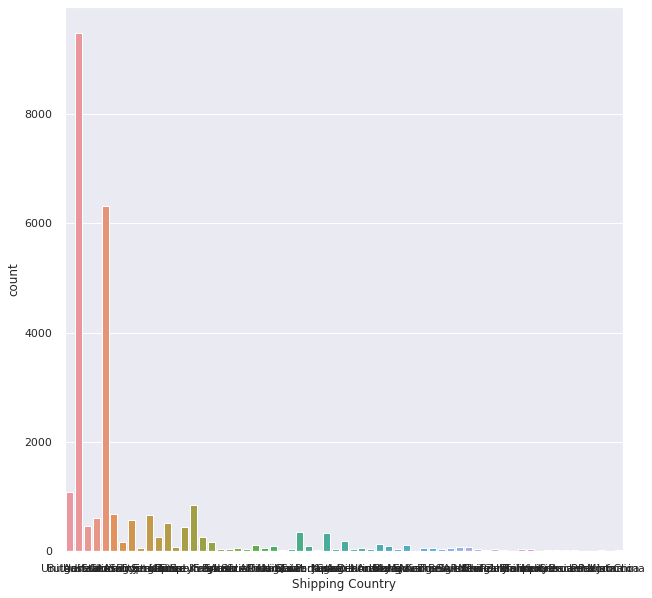

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x ='Shipping Country', data = df)
plt.show()

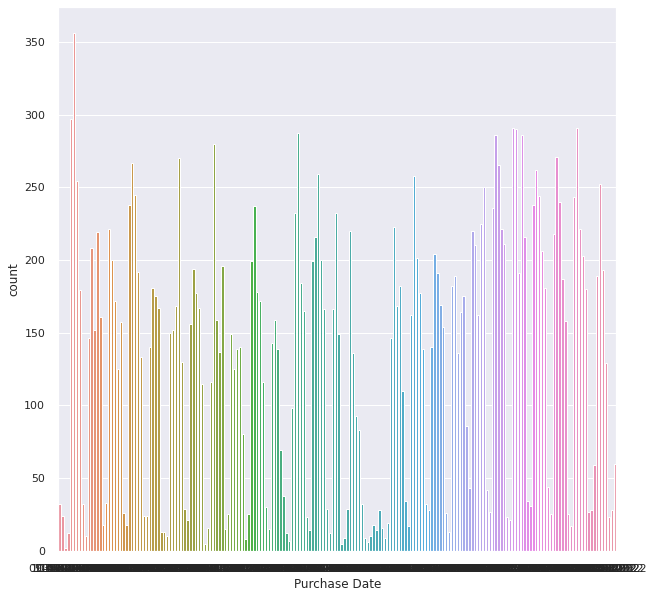

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x ='Purchase Date', data = df)
plt.show()

In [21]:
#data pre-processing
df.head()

,Purchase Date,Product Name,OEM,Item Price USD,Ordered Qty,Row Total,Shipping Country,Region
0,09-09-2021,Macbook Pro 13” i7,apple-13-i7,1811.0,1,1811.0,Bulgaria,EMEA
1,09-09-2021,Macbook Pro 13” i7,apple-13-i7,1811.0,1,1811.0,Bulgaria,EMEA
2,09-09-2021,Dell Multi-device Wireless Mouse - MS5320W,dell-MS5320W,25.0,1,25.0,United States,EMEA
3,09-09-2021,Apple Magic Mouse,apple-magic-mouse,100.0,1,100.0,Bulgaria,Shipping Country Argentina Armenia Australia A...
4,09-09-2021,Apple Magic Mouse,apple-magic-mouse,100.0,1,100.0,Bulgaria,Shipping Country Argentina Armenia Australia A...


In [22]:
#Label Encoding
encoder = LabelEncoder()

In [23]:
df['Product Name'] = encoder.fit_transform(df['Product Name'])
df['OEM'] = encoder.fit_transform(df['OEM'])
df['Shipping Country'] = encoder.fit_transform(df['Shipping Country'])
#df['Region'] = encoder.fit_transform(df['Region'])

In [24]:
df.head()

,Purchase Date,Product Name,OEM,Item Price USD,Ordered Qty,Row Total,Shipping Country,Region
0,09-09-2021,114,11,1811.0,1,1811.0,6,EMEA
1,09-09-2021,114,11,1811.0,1,1811.0,6,EMEA
2,09-09-2021,56,249,25.0,1,25.0,61,EMEA
3,09-09-2021,18,65,100.0,1,100.0,6,Shipping Country Argentina Armenia Australia A...
4,09-09-2021,18,65,100.0,1,100.0,6,Shipping Country Argentina Armenia Australia A...


In [25]:
df= df.drop(['Region'], axis =1 )

In [26]:
df.head()

,Purchase Date,Product Name,OEM,Item Price USD,Ordered Qty,Row Total,Shipping Country
0,09-09-2021,114,11,1811.0,1,1811.0,6
1,09-09-2021,114,11,1811.0,1,1811.0,6
2,09-09-2021,56,249,25.0,1,25.0,61
3,09-09-2021,18,65,100.0,1,100.0,6
4,09-09-2021,18,65,100.0,1,100.0,6


In [27]:
x = df.drop(columns = ['Row Total','Purchase Date'], axis =1)
y = df['Row Total']

In [28]:
print(x)

       Product Name  OEM  Item Price USD  Ordered Qty  Shipping Country
0               114   11         1811.00            1                 6
1               114   11         1811.00            1                 6
2                56  249           25.00            1                61
3                18   65          100.00            1                 6
4                18   65          100.00            1                 6
...             ...  ...             ...          ...               ...
25025            51  212         1360.00            1                60
25026            81  242           40.00            1                 6
25027            90  303           79.00            1                 6
25028            95  341        10800.00            1                22
25029            62  200       205620.87            1                22

[25030 rows x 5 columns]


In [29]:
print(y)

0          1811.00
1          1811.00
2            25.00
3           100.00
4           100.00
           ...    
25025      1360.00
25026        40.00
25027        79.00
25028     10800.00
25029    205620.87
Name: Row Total, Length: 25030, dtype: float64


In [30]:
#splitting data into training and testing data
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 2 )

In [31]:
print(x.shape, x_train.shape, x_test.shape)

(25030, 5) (20024, 5) (5006, 5)


In [32]:
print(y.shape, y_train.shape, y_test.shape)

(25030,) (20024,) (5006,)


In [33]:
#Machine Learning model training
# XGBoost Regressor
regressor = XGBRegressor()

In [34]:
regressor.fit(x_train, y_train)

[19:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [35]:
#evaluation of the model
training_prediction = regressor.predict(x_train)

In [36]:
print(training_prediction)

[  67.35276    44.513927   43.190735 ...  326.7545    148.71693
 1358.4506  ]


In [37]:
r2_score_train = metrics.r2_score(y_train, training_prediction)

In [38]:
print('R Squared value train :', r2_score_train)

R Squared value train : 0.9999979473656844


In [39]:
#predict for test data
test_prediction = regressor.predict(x_test)

In [40]:
print(test_prediction)

[1.1088238e+01 1.0114380e+02 1.1408765e+01 ... 4.0997227e+04 2.5182907e+02
 3.2675449e+02]


In [41]:
r2_score_test = metrics.r2_score(y_test, test_prediction)

In [42]:
print('R Squared value test:', r2_score_test)

R Squared value test: 0.9999964345664892


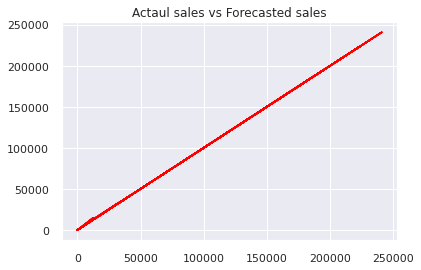

In [43]:
plt.plot(y_test, test_prediction, color = 'red')
plt.title('Actaul sales vs Forecasted sales')
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
LRClassifier = LinearRegression ()# object  of algorithm
LRClassifier.fit (x_train, y_train)

LinearRegression()

In [46]:
m=LRClassifier.coef_  # slope
c=LRClassifier.intercept_   #intersecpt
print("slope",m)
print("intercept",c)


slope [ 5.74020983e-03  2.63891327e-02  1.00007338e+00  6.39087310e+03
 -1.49550022e-01]
intercept -6392.16025452272


In [47]:
prediction = LRClassifier.predict (x_train)
print(prediction)

[  71.58255746   37.2653161    44.66960775 ...  336.01467119  146.38998156
 1361.13944708]


In [48]:
r1_score_train = metrics.r2_score(y_train, prediction)

In [49]:
print('R Squared value train :', r1_score_train)

R Squared value train : 0.9999144745955831


In [50]:
#predict for test data
LR_test_prediction = LRClassifier.predict(x_test)

In [51]:
print(LR_test_prediction)

[ 5.66891071e-01  9.72487003e+01 -2.74843566e+00 ...  4.10128123e+04
  2.44479915e+02  3.27191220e+02]


In [52]:
r1_score_test = metrics.r2_score(y_test, LR_test_prediction)

In [53]:
print('R Squared value test:', r1_score_test)

R Squared value test: 0.999951250891881


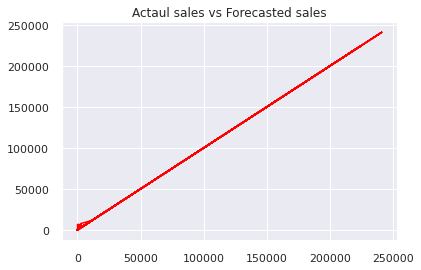

In [54]:
plt.plot(y_test, LR_test_prediction, color = 'red')
plt.title('Actaul sales vs Forecasted sales')
plt.show()

In [55]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('Oasis_Store.pickle')
print(projectabspathname)
projectname = 'Oasis_Store.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

/content/Oasis_Store.pickle
